In [25]:
#  import the CSV file Male.csv
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('Male_csv.csv')

In [26]:
"""Here we will find which product is most consumed by the all Males in the given data set"""

Product_data_of_male=df.groupby('Product Category')['Quantity'].sum().sort_values(ascending=True)
print(Product_data_of_male)

Product Category
Beauty         353
Electronics    410
Clothing       453
Name: Quantity, dtype: int64


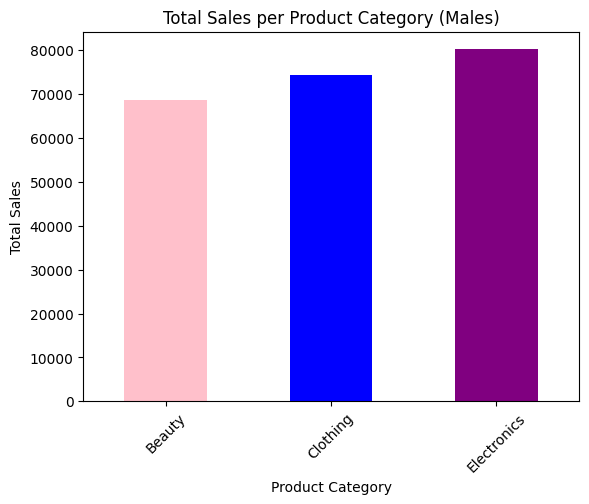

In [27]:
"""Visualzation of total Amount sale of all the product and representation in the form of
the Bar Graph """

per_category_sales = df.groupby('Product Category')['Total Amount'].sum()
per_category_sales.plot(kind='bar', color=['pink', 'blue', 'purple'])
plt.title('Total Sales per Product Category (Males)')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


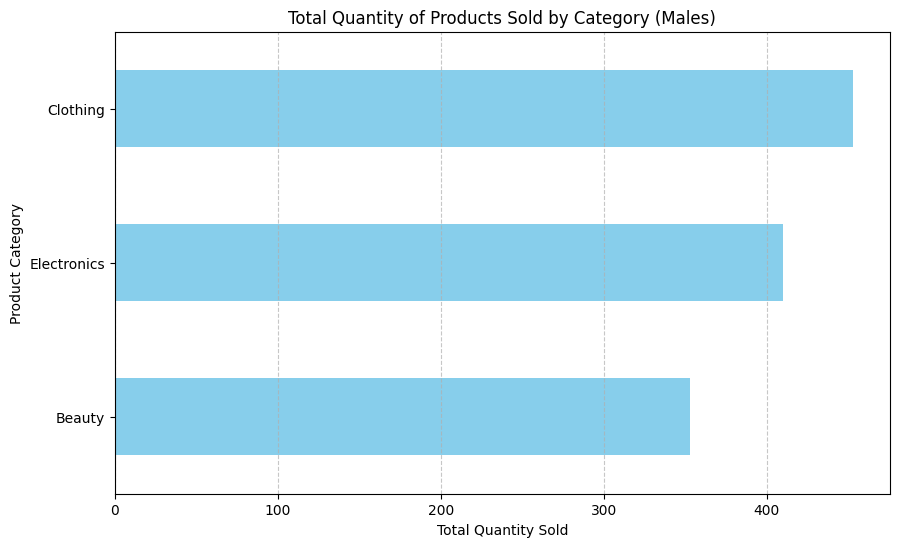

In [28]:
#Creation of the Graph to show the Product Category 

Product_data_of_male.plot(kind='barh', color='skyblue', figsize=(10, 6))
plt.xlabel("Total Quantity Sold")
plt.ylabel("Product Category")
plt.title("Total Quantity of Products Sold by Category (Males)")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [29]:
"""
Here we will make three different age groups which deals with the product consumptions and tell
how much the count each age group will hold in it
"""

# Creating DataFrames for different age groups
young_age_people_male = df[(df['Age'] >= 0) & (df['Age'] <= 25)]
middle_age_people_male = df[(df['Age'] > 25) & (df['Age'] <= 50)]
older_age_people_male = df[(df['Age'] > 50) & (df['Age'] <= 100)]

print('Which age Group contributes in the growth of the Sales the Most in Number of Buyers')
print(f'Total No of the Male that fall under the younger age group are: {len(young_age_people_male)}')
print(f'Total No of the Male that fall under the middle age group are: {len(middle_age_people_male)}')
print(f'Total No of the Male that fall under the older age group are: {len(older_age_people_male)}')

Which age Group contributes in the growth of the Sales the Most in Number of Buyers
Total No of the Male that fall under the younger age group are: 88
Total No of the Male that fall under the middle age group are: 247
Total No of the Male that fall under the older age group are: 155


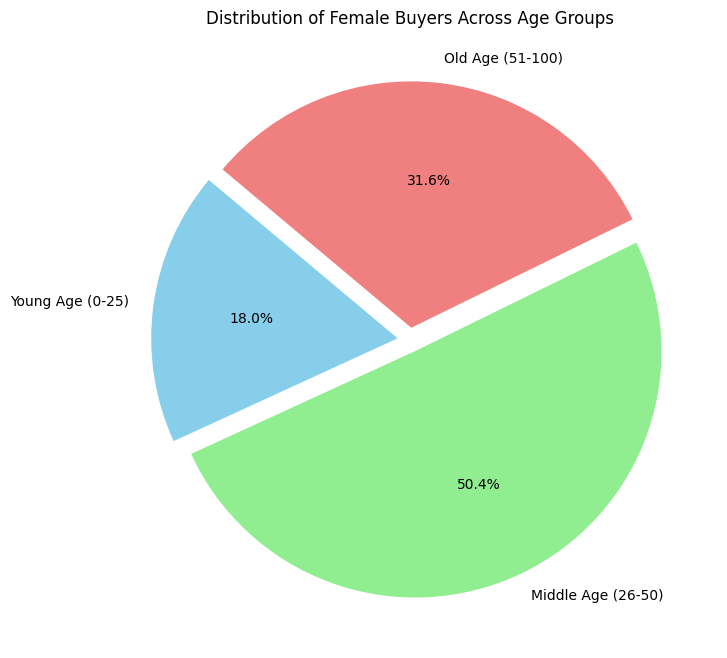

In [30]:
#Creation of the Graph to show the Group Contribution of the various age group  

# Data for the pie chart
age_group_counts = {
    "Young Age (0-25)": len(young_age_people_male),
    "Middle Age (26-50)": len(middle_age_people_male),
    "Old Age (51-100)": len(older_age_people_male)
}

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(age_group_counts.values(), labels=age_group_counts.keys(), autopct='%1.1f%%', 
        colors=['skyblue', 'lightgreen', 'lightcoral'], startangle=140, explode=[0.05, 0.05, 0.05])
plt.title("Distribution of Female Buyers Across Age Groups")
plt.show()

In [31]:
"""
Here we will make three different age groups which deals with the product consumptions and tell
how much which product is consumed by which group and which group is highest buyer of the various
products.
"""

# Creating DataFrames for different age groups
young_age_people_male = df[(df['Age'] >= 0) & (df['Age'] <= 25)]
middle_age_people_male = df[(df['Age'] > 25) & (df['Age'] <= 50)]
older_age_people_male = df[(df['Age'] > 50) & (df['Age'] <= 100)]

# Function to calculate total and most sold product for an age group
def analyze_age_group(age_group_df, age_label):
    count_of_products = age_group_df.groupby('Product Category')['Quantity'].sum()
    sum_of_all_products = count_of_products.sum()
    most_consumed_product = count_of_products.idxmax()  

    print(f"\nThe Data for {age_label} Males")
    print(f"Total Products Sold: {sum_of_all_products}")
    print(f"Most Sold Product: {most_consumed_product}")
    print(count_of_products.to_string() + "\n")

    return sum_of_all_products, most_consumed_product, count_of_products  # Returning count_of_products for further use

# Analyze each age group
sum_of_all_products_young, most_sold_young, young_product_counts = analyze_age_group(young_age_people_male, "Younger")
sum_of_all_products_middle, most_sold_middle, middle_product_counts = analyze_age_group(middle_age_people_male, "Middle")
sum_of_all_products_old, most_sold_old, old_product_counts = analyze_age_group(older_age_people_male, "Older")

# Store total product sales in a dictionary
age_group_sales = {
    "Young Age (0-25)": sum_of_all_products_young,
    "Middle Age (26-50)": sum_of_all_products_middle,
    "Old Age (51-100)": sum_of_all_products_old
}

# Identify the age group with the highest total sales
max_age_group = max(age_group_sales, key=age_group_sales.get)

# Find the most sold product within the highest consuming age group
if max_age_group == "Young Age (0-25)":
    most_sold_product_overall = young_product_counts.idxmax()
elif max_age_group == "Middle Age (26-50)":
    most_sold_product_overall = middle_product_counts.idxmax()
else:
    most_sold_product_overall = old_product_counts.idxmax()

# Print results
print("\n **Total Product Consumption by Age Group**:")
for age_group, total in age_group_sales.items():
    print(f"{age_group}: {total} products")

print(f"\nThe age group with the **highest product consumption** is **{max_age_group}** with {age_group_sales[max_age_group]} products.")
print(f"\nThe most consumed product in the highest consuming age group ({max_age_group}) is: **{most_sold_product_overall}**\n")



The Data for Younger Males
Total Products Sold: 215
Most Sold Product: Clothing
Product Category
Beauty         72
Clothing       81
Electronics    62


The Data for Middle Males
Total Products Sold: 621
Most Sold Product: Clothing
Product Category
Beauty         191
Clothing       246
Electronics    184


The Data for Older Males
Total Products Sold: 380
Most Sold Product: Electronics
Product Category
Beauty          90
Clothing       126
Electronics    164


 **Total Product Consumption by Age Group**:
Young Age (0-25): 215 products
Middle Age (26-50): 621 products
Old Age (51-100): 380 products

The age group with the **highest product consumption** is **Middle Age (26-50)** with 621 products.

The most consumed product in the highest consuming age group (Middle Age (26-50)) is: **Clothing**



#### Number of time each product buyed by an individual customer

In [32]:
Beauty_df = df[df['Product Category']=='Beauty']
# print(Beauty_df)
print(f'Numbers of Beauty Product buyed each Males in different quantity: {len(Beauty_df)}')

Numbers of Beauty Product buyed each Males in different quantity: 141


In [33]:
Clothing_df = df[df['Product Category']=='Clothing']
# print(Beauty_df)
print(f'Numbers of Cloths Product buyed each Males in different quantity: {len(Clothing_df)}')

Numbers of Cloths Product buyed each Males in different quantity: 177


In [34]:
ele_df = df[df['Product Category']=='Electronics']
# print(Beauty_df)
print(f'Numbers of Electronics Product buyed each Males in different quantity: {len(ele_df)}')

Numbers of Electronics Product buyed each Males in different quantity: 172


#### Monthly Sales Trend for Each Product Category

In [35]:

df['Date'] = pd.to_datetime(df['Date'])
# Extract month from the date
df['Month'] = df['Date'].dt.month

# Group by Month and Product Category
monthly_sales = df.groupby(['Month', 'Product Category'])['Total Amount'].sum().unstack()

# Display sales data
print(monthly_sales)

Product Category  Beauty  Clothing  Electronics
Month                                          
1                   4525      5750         1980
2                  10435      9190        10040
3                   2700     11070         1900
4                   5740      5920         4910
5                   4485      9345        15390
6                   4675      6335         8830
7                   7700      2900         7980
8                   5590      5130         4160
9                   3845      1510         1730
10                  7305      4250         8425
11                  5135      7725         7170
12                  6550      5180         7655


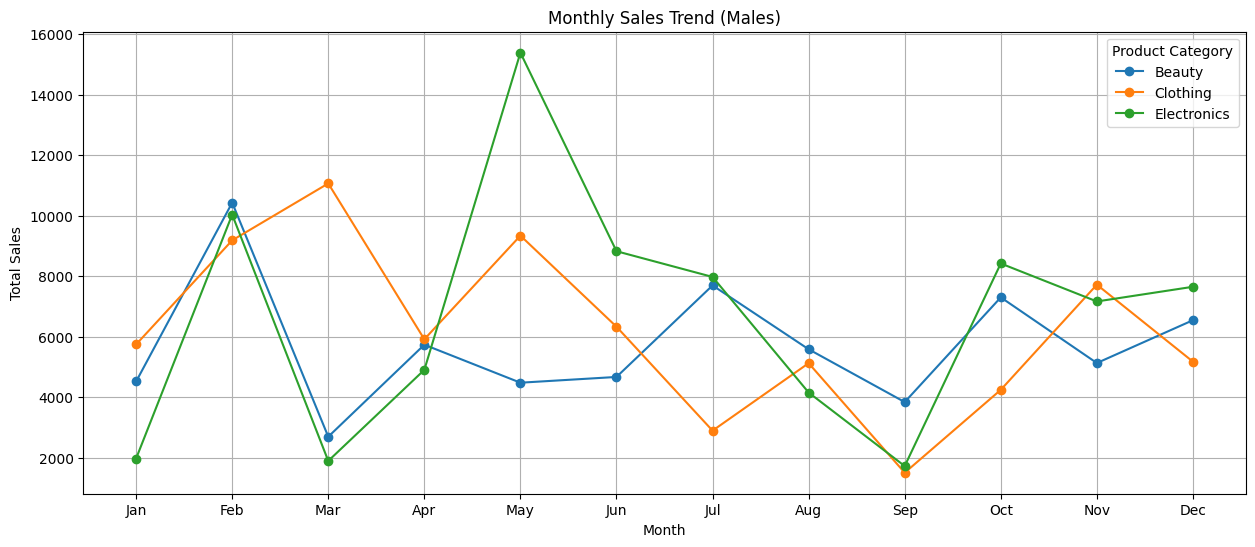

In [36]:
monthly_sales.plot(kind='line', marker='o', figsize=(15, 6))
plt.title('Monthly Sales Trend (Males)')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Product Category')
plt.grid()
plt.show()

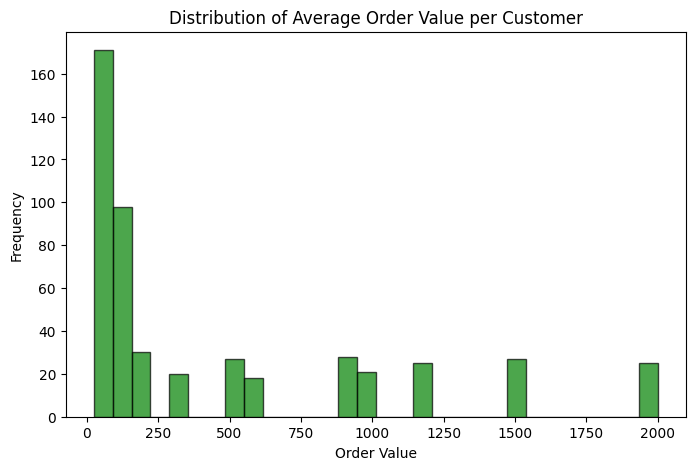

In [37]:
# Calculate average order value per customer
avg_order_value = df.groupby('Customer ID')['Total Amount'].mean()

plt.figure(figsize=(8, 5))
plt.hist(avg_order_value, bins=30, color='green', edgecolor='black', alpha=0.7)
plt.title('Distribution of Average Order Value per Customer')
plt.xlabel('Order Value')
plt.ylabel('Frequency')
plt.show()